In [1]:
import numpy as np
from matplotlib.pyplot import *

from prospect.models.templates import TemplateLibrary
from prospect.plotting.sfh import parametric_sfr
from prospect.plotting.sfh import parametric_pset
from prospect.plotting.sfh import compute_mass_formed
from prospect.models.transforms import tburst_from_fage

import sys
sys.path.append('/home/samantha/Documents/REU/scripts/') # Use the absolute path to the directory
# sys.path.append('/home/samantha/Documents/REU/npys/')
%pwd
from prospectFunctionsSFH import *

from astropy.cosmology import Planck13

In [2]:
imf_type = 0
num_models = 100*6*100 #len(logzs)*len(dusts)*len(tages)
data_grid_params = np.load(f'/home/samantha/Documents/REU/npys/params_imf_{imf_type}_{num_models}.npy')

In [26]:
print('tage bounds:', data_grid_params[0,0,[0,-1],-1]) # logzsol, dust2, tage
tages = np.logspace(-1,np.log10(2),100)

tage bounds: [0.1 2. ]


In [28]:
def getRanges(bounds_dict, N=5):
    keys = list(bounds_dict.keys())
    values = np.zeros([len(keys),N])
    for i, key in enumerate(keys):
        if key in ['tage']:
            values[i,:] = np.logspace(bounds_dict[key][0], bounds_dict[key][-1], N)
        else:
            values[i,:] = np.linspace(bounds_dict[key][0], bounds_dict[key][-1], N)
    ranges_dict = dict(zip(keys,values))
    return ranges_dict

In [38]:
ranges_dict = getRanges(free_params)
ranges_dict

{'tage': array([0.1       , 0.21147425, 0.4472136 , 0.94574161, 2.        ]),
 'fburst': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 'fage_burst': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 'tburst': array([0.       , 0.0752575, 0.150515 , 0.2257725, 0.30103  ])}

In [47]:
tburst_from_fage(tage=run_params['tage'], fage_burst=free_params['fage_burst'][0])

0.0

In [48]:
run_params = {}
run_params['zred'] = 3.548 # Redshift of the cliff
run_params['mass'] = 1e8
run_params['logzsol'] = 0.0 # Solar metallicity
run_params['dust2'] = 0.0 # No dust in the galaxy
run_params['sfh'] = 1 # tau model plus a constant component and a burst (4 for delay tau, unecessary for our purpose)
run_params['imf_type'] = 2 # (Kroupa 2001)
run_params['dust_type'] = 0

free_params = {} # Use free_params to establish upper and lower bounds of priors for free parameters
# free_params['tau'] = []
free_params['tage'] = [-1,np.log10(2.0)] # logspace
free_params['fburst'] = [0,1]
free_params['fage_burst'] = [0,1]

# Should not need a range for tbursts, can just do conversion in for loop later
# free_params['tburst'] = [tburst_from_fage(tage=run_params['tage'], fage_burst=free_params['fage_burst'][0]), 
#                          tburst_from_fage(tage=run_params_params['tage'], fage_burst=free_params['fage_burst'][-1])]
# Should set `const` depending on fburst later (since `const + fburst <= 1)
# free_params['const'] = True

# First set fsf_start and fsf_trunc to determine by what fraction of sfh is delayed at by what fraction sfh is truncated
# free_params['sf_start'] = True
# free_params['sf_trunc'] = True

# i = 0
# for key in list(free_params.keys()):
#     run_params[key] = param_ranges[key][i]


# CHANGE THE FOLLOWING SECTION, THIS IS ONLY TEMPORARY FOR TESTING FUNCTIONS OUT BELOW
run_params['add_burst'] = True
run_params['add_trunc'] = True


run_params['tau'] = 0.05
run_params['tage'] = 1.0
run_params['fburst'] = .8
run_params['fage_burst'] = .5
run_params['tburst'] = tburst_from_fage(**run_params) # The age of the universe (age of the host) when the burst occurred
run_params['const'] = 0
run_params['sf_start'] = 0
run_params['sf_trunc'] = 0

# obs = getObs()
# sps = getSps(**run_params)

In [49]:
run_params

{'zred': 3.548,
 'mass': 100000000.0,
 'logzsol': 0.0,
 'dust2': 0.0,
 'sfh': 1,
 'imf_type': 2,
 'dust_type': 0,
 'add_burst': True,
 'add_trunc': True,
 'tau': 0.05,
 'tage': 1.0,
 'fburst': 0.8,
 'fage_burst': 0.5,
 'tburst': 0.5,
 'const': 0,
 'sf_start': 0,
 'sf_trunc': 0}

#### MAKE A GET PARAMS FUNCTION AND FINISH ^^^^

- find reasonable range for each parameter
    - tau         |  []
    - tage        |  [] (same a maximized before?)
    - fburst      |  [0,1] (linspace)
    - fage_burst  |  [0,1]
    - const       |  []
    - sf_start    |  []
    - sf_trunc    |  []
        - to do this step, use the parametric_sfh to plot all the variations of a specfic variable all on the same plot

In [145]:
tburst_from_fage(**run_params)
help(tburst_from_fage)

Help on function tburst_from_fage in module prospect.models.transforms:

tburst_from_fage(tage=0.0, fage_burst=0.0, **extras)
    This function transfroms from a fractional age of a burst to an absolute
    age.  With this transformation one can sample in ``fage_burst`` without
    worry about the case ``tburst`` > ``tage``.

    Parameters
    ----------
    tage : float, Gyr
        The age of the host galaxy.

    fage_burst : float between 0 and 1
        The fraction of the host age at which the burst occurred.

    Returns
    -------
    tburst : float, Gyr
        The age of the host when the burst occurred (i.e. the FSPS ``tburst``
        parameter)



In [146]:
run_params['const'] = 1

In [147]:
parametric_pset(**run_params)

Namespace(mass=array([1.e+08]), sfh=1, sf_start=array([0]), tage=array([1.5]), tau=array([0.05]), const=array([1]), fburst=array([0.8]), tburst=array([0.75]), sf_trunc=array([0]), sf_slope=array([0.]))

In [148]:
times = np.linspace(0,run_params['tage'],10000)
truncs = [0]

figure(figsize=(8,5))
for f in truncs:
    # run_params['fage_burst'] = f
    # run_params['tburst'] = tburst_from_fage(tage=run_params['tage'],fage_burst=f)
    run_params['sf_trunc'] = f
    print(run_params)
    sfrs = parametric_sfr(times=times,**run_params)
    plot(times,sfrs,label=f'{f}')

xlim([times[-1]*1.01,times[0]/1.01])
legend()

xlabel('Lookback Time [Gyrs]')
ylabel(r'Star Formation Rate [$M_{\odot}$ $yr^{-1}$]')

title_text = 'SFH'
title(title_text)

show()

{'zred': 3.548, 'mass': 100000000.0, 'logzsol': 0.0, 'dust2': 0.0, 'sfh': 1, 'imf_type': 2, 'dust_type': 0, 'add_burst': True, 'add_trunc': True, 'tau': 0.05, 'tage': 1.5, 'fburst': 0.8, 'fage_burst': 0.5, 'tburst': 0.75, 'const': 1, 'sf_start': 0, 'sf_trunc': 0}


ValueError: Constant and burst fractions combine to be > 1

<Figure size 800x500 with 0 Axes>

In [149]:
model = getModel(**run_params)

In [136]:
sps = getSps(**run_params)
obs = getObs()

In [131]:
wspec = sps.wavelengths

In [137]:
spec, phot, mfrac = model.predict(model.theta,obs=obs,sps=sps)

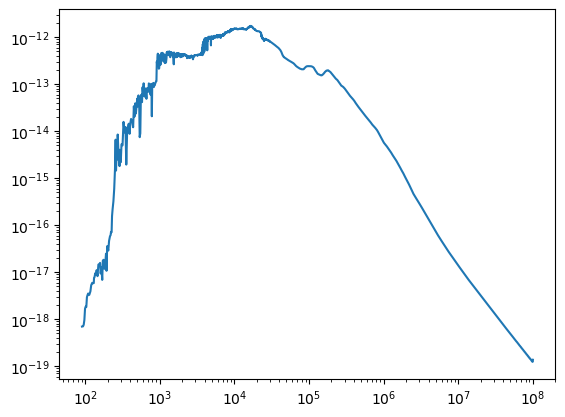

In [138]:
loglog(wspec,spec)

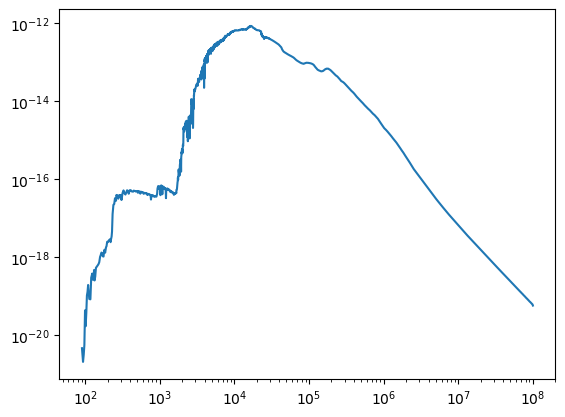

In [133]:
loglog(wspec,spec)

In [97]:
figure(figsize=(8,4))

times = np.linspace(0,run_params['tage'],1000)
times_plot = times + Planck13.lookback_time(run_params['zred']).value

# fages = np.linspace(0,1,3)
# ranges_dict['fage_burst'] = fages

current = 'fage_burst'

for f in ranges_dict[current]:
    run_params[current] = f
    run_params['tburst'] = tburst_from_fage(**run_params)
    print(run_params['fage_burst'],run_params['tage'],'\n', run_params)
    sfrs = parametric_sfr(times=times,**run_params)
    plot(times_plot,sfrs,label=f'{current}={f}')

xlabel('Lookback Time [Gyrs]')
ylabel(r'Star Formation Rate [$M_{\odot}$ $yr^{-1}$]')

title_text = 'SFH'
title(title_text)

xlim([times_plot[-1]*1.001,times_plot[0]/1.001])

legend()
tight_layout()

show()

NameError: name 'ranges_dict' is not defined

<Figure size 800x400 with 0 Axes>

------------

In [59]:
from prospect.models.templates import TemplateLibrary

In [60]:
TemplateLibrary.show_contents()

'type_defaults':
  Explicitly sets dust amd IMF types.
'ssp':
  Basic set of (free) parameters for a delta function SFH
'parametric_sfh':
  Basic set of (free) parameters for a delay-tau SFH.
'dust_emission':
  The set of (fixed) dust emission parameters.
'nebular':
  The set of nebular emission parameters, with gas_logz tied to stellar logzsol.
'nebular_marginalization':
  Marginalize over emission amplitudes line contained inthe observed spectrum
'fit_eline_redshift':
  Fit for the redshift of the emission lines separatelyfrom the stellar redshift
'agn_eline':
  Add AGN emission lines
'outlier_model':
  The set of outlier (mixture) models for spectroscopy and photometry
'agn':
  The set of (fixed) AGN dusty torus emission parameters.
'igm':
  The set of (fixed) IGM absorption parameters.
'spectral_smoothing':
  Set of parameters for spectal smoothing.
'optimize_speccal':
  Set of parameters (most of which are fixed) for optimizing a polynomial calibration vector.
'fit_speccal':
  Set

In [24]:

def getModel(add_burst=False, add_trunc=False, **extras):

    from prospect.models import SpecModel
    from prospect.models.templates import TemplateLibrary

    model_params = TemplateLibrary['parametric_sfh']

    if add_burst:
        model_params.update(TemplateLibrary['burst_sfh'])
        model_params['const'] = {'N': 1, 'isfree': False, 'init': 0.0, 'units': 'Solar Masses per year'}
        if add_trunc:
            model_params['sf_start'] = {'N': 1, 'isfree': False, 'init': 0.0, 'units': 'Gyrs'}
            model_params['sf_trunc'] = {'N': 1, 'isfree': False, 'init': 0.0, 'units': 'Gyrs'}

    for key in list(model_params.keys()):
        model_params[key]['init'] = extras[key]

    model = SpecModel(model_params)
    
    return model_params, model

In [25]:
model_params = TemplateLibrary['parametric_sfh']
model_params

{'zred': {'N': 1,
  'isfree': False,
  'init': 0.1,
  'units': 'redshift',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0)},
 'mass': {'N': 1,
  'isfree': True,
  'init': 10000000000.0,
  'units': 'Solar masses formed',
  'prior': <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0)},
 'logzsol': {'N': 1,
  'isfree': True,
  'init': -0.5,
  'units': '$\\log (Z/Z_\\odot)$',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)},
 'dust2': {'N': 1,
  'isfree': True,
  'init': 0.6,
  'units': 'optical depth at 5500AA',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)},
 'sfh': {'N': 1, 'isfree': False, 'init': 4, 'units': 'FSPS index'},
 'tage': {'N': 1,
  'isfree': True,
  'init': 1,
  'units': 'Gyr',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8)},
 'imf_type': {'N': 1, 'isfree': False, 'init': 2},
 'dust_type': {'N': 1, 'isfree': False, 'init': 0},
 'tau': {'N': 1,
  'isfr